In [2]:
!pip install keras
!pip install matplotlib

Epoch 1/20
235/235 [==============================] - 3s 12ms/step - loss: 0.6957 - accuracy: 0.0016 - val_loss: 0.6955 - val_accuracy: 0.0013
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.6954 - accuracy: 0.0017 - val_loss: 0.6952 - val_accuracy: 0.0012
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.6951 - accuracy: 0.0016 - val_loss: 0.6949 - val_accuracy: 0.0011
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.6948 - accuracy: 0.0016 - val_loss: 0.6947 - val_accuracy: 0.0011
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.6945 - accuracy: 0.0017 - val_loss: 0.6944 - val_accuracy: 0.0010
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.6943 - accuracy: 0.0014 - val_loss: 0.6941 - val_accuracy: 0.0010
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 0.6940 - accuracy: 0.0017 - val_loss: 0.6938 - val_accuracy: 0.0010

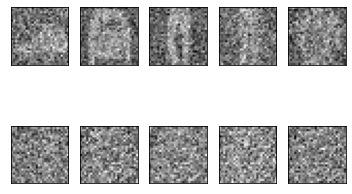

In [18]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
#encoder model
encoder = Model(input_img,encoded)
#encoded input size
encoded_input = Input(shape=(encoding_dim))
#decoder layer
decoder_layer = autoencoder.layers[-1]
#decoder model
decoder = Model(encoded_input,decoder_layer(encoded_input))
#compile model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
#fit autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))
#encode images
encoded_img = encoder.predict(x_test_noisy)
#deocde images
decoded_img = decoder.predict(encoded_img)

import matplotlib.pyplot as plt
n=5
for i in range(n):
  x = plt.subplot(2,n,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  x.get_xaxis().set_visible(False)
  x.get_yaxis().set_visible(False)

  x = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_img[i].reshape(28,28))
  plt.gray()
  x.get_xaxis().set_visible(False)
  x.get_yaxis().set_visible(False)

plt.show()



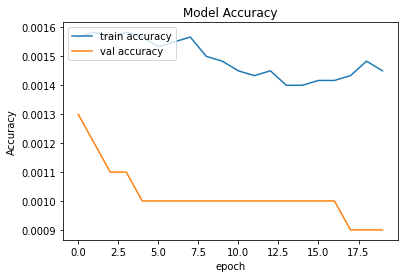

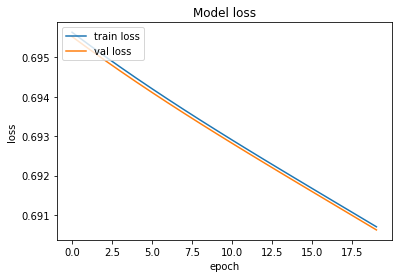

In [19]:
#plot train and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title('Model Accuracy')
plt.legend(['train accuracy','val accuracy'], loc = 'upper left')
plt.show()
#plot train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Model loss')
plt.legend(['train loss','val loss'], loc = 'upper left')
plt.show()